In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-02-12 15:03:52--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0b::cf, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   201MB/s    in 0.7s    

2024-02-12 15:03:52 (201 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [ ]:
import os

# directory with our training horse pictures
train_horse_directory = os.path.join('./horse-or-human/horses')

# directory with our training house pictures
train_human_directory = os.path.join('./horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_directory)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_directory)
print(train_human_names[:10])

['horse08-7.png', 'horse18-8.png', 'horse07-3.png', 'horse21-3.png', 'horse32-8.png', 'horse47-6.png', 'horse01-7.png', 'horse14-9.png', 'horse13-0.png', 'horse13-4.png']
['human09-12.png', 'human09-20.png', 'human10-29.png', 'human09-15.png', 'human17-17.png', 'human15-11.png', 'human04-20.png', 'human09-18.png', 'human10-30.png', 'human14-06.png']


In [ ]:
len(train_horse_names)

500

In [ ]:
len(train_human_names)

527

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimage

# Parameters for our graph; we'll output images in a 4x4 configuration
rows = 4
cols = 4

# index for iterating over the images
index = 0

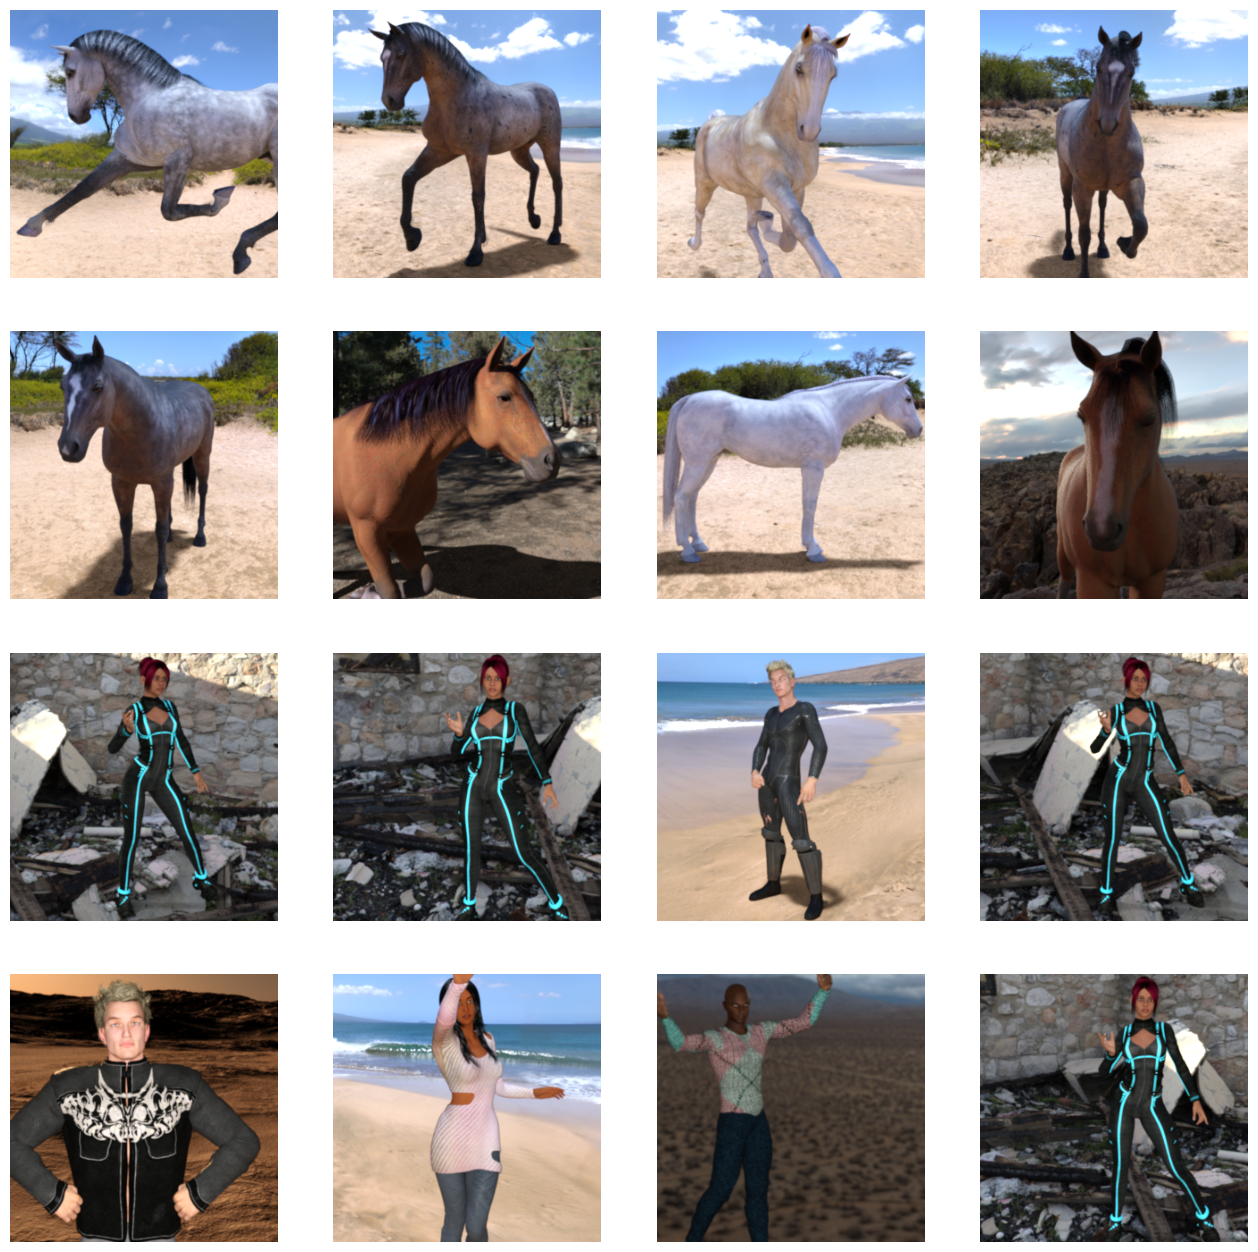

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)

index += 8

next_horse_pic = [os.path.join(train_horse_directory, fname)
                for fname in train_horse_names[index-8:index]]

next_human_pic = [os.path.join(train_human_directory, fname)
                for fname in train_human_names[index-8:index]]

for i, image_path in enumerate(next_horse_pic + next_human_pic):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(rows, cols, i+1)
    sp.axis('off')

    image = mpimage.imread(image_path)
    plt.imshow(image)

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    keras.layers.MaxPool2D(2, 2),

    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),

    keras.layers.Flatten(),

    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 149, 149, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 35, 35, 64)       

In [ ]:
from keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer=RMSprop(learning_rate=0.001))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_data_generator.flow_from_directory(
    './horse-or-human/',
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [ ]:
hostory=model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=30,
    verbose=1
)

Epoch 1/30
8/8 [==============================] - 7s 872ms/step - loss: 0.1029 - accuracy: 0.9611
Epoch 2/30
8/8 [==============================] - 7s 888ms/step - loss: 2.4042 - accuracy: 0.8532
Epoch 3/30
8/8 [==============================] - 7s 835ms/step - loss: 0.0834 - accuracy: 0.9766
Epoch 4/30
8/8 [==============================] - 7s 805ms/step - loss: 0.2525 - accuracy: 0.9143
Epoch 5/30
8/8 [==============================] - 7s 833ms/step - loss: 0.0436 - accuracy: 0.9833
Epoch 6/30
8/8 [==============================] - 7s 869ms/step - loss: 0.0387 - accuracy: 0.9878
Epoch 7/30
8/8 [==============================] - 7s 864ms/step - loss: 0.0239 - accuracy: 0.9900
Epoch 8/30
8/8 [==============================] - 7s 834ms/step - loss: 0.0266 - accuracy: 0.9900
Epoch 9/30
8/8 [==============================] - 8s 917ms/step - loss: 0.0345 - accuracy: 0.9873
Epoch 10/30
8/8 [==============================] - 7s 1s/step - loss: 0.0088 - accuracy: 0.9978
Epoch 11/30
8/8 [=====

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis = 0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)
    print(classes[0])

    if classes[0] > 0.5:
        print(fn + " is human")

    else:
        print(fn + " is horse")

Saving alireza-dolati-YiA7yoVWB8o-unsplash.jpg to alireza-dolati-YiA7yoVWB8o-unsplash.jpg
1/1 [==============================] - 0s 18ms/step
[0.01178613]
alireza-dolati-YiA7yoVWB8o-unsplash.jpg is horse
